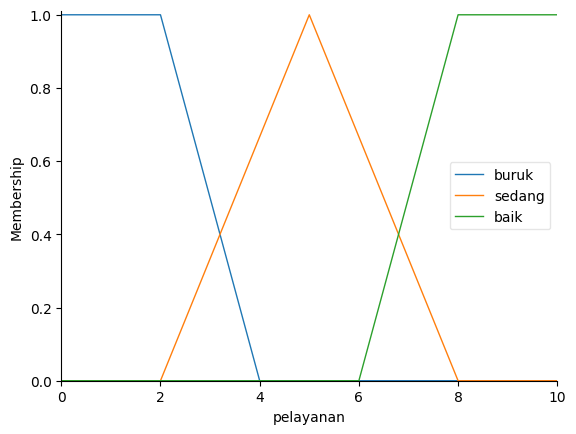

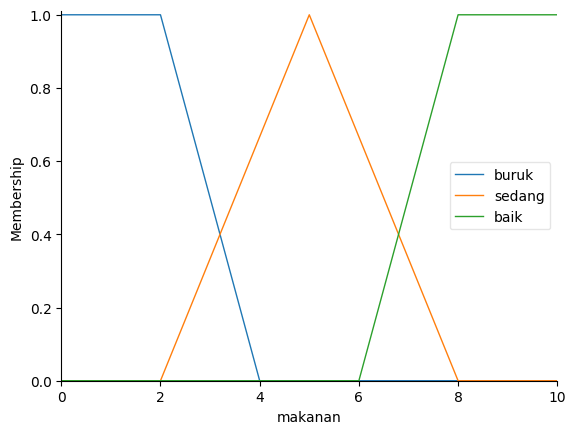

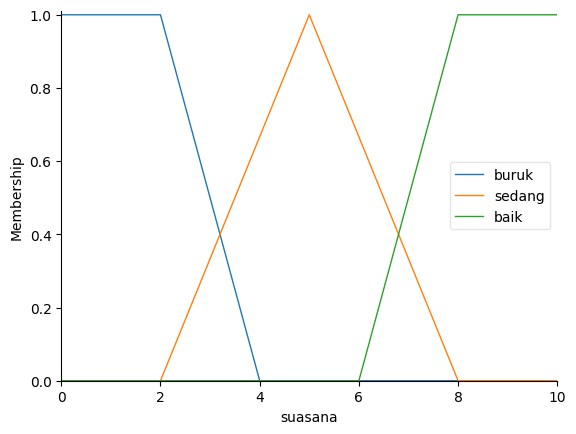

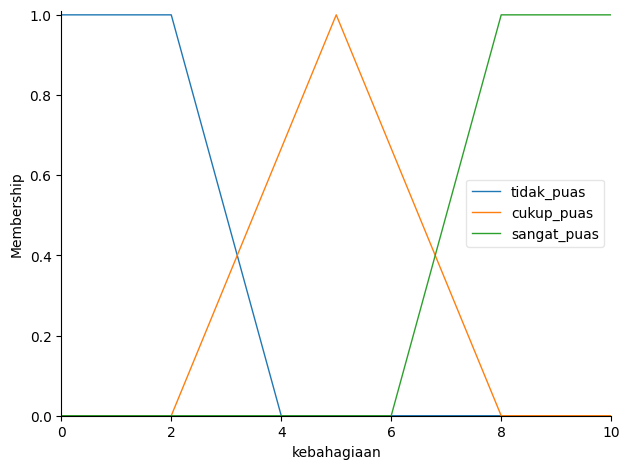

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Parameter input: Kecepatan Pelayanan, Kualitas Makanan, Suasana Restoran
pelayanan = ctrl.Antecedent(np.arange(0, 11, 1), 'pelayanan')
makanan = ctrl.Antecedent(np.arange(0, 11, 1), 'makanan')
suasana = ctrl.Antecedent(np.arange(0, 11, 1), 'suasana')

# Parameter output: Kebahagiaan Pelanggan
kebahagiaan = ctrl.Consequent(np.arange(0, 11, 1), 'kebahagiaan')

# Himpunan fuzzy untuk tiap parameter input
pelayanan['buruk'] = fuzz.trapmf(pelayanan.universe, [0, 0, 2, 4])
pelayanan['sedang'] = fuzz.trimf(pelayanan.universe, [2, 5, 8])
pelayanan['baik'] = fuzz.trapmf(pelayanan.universe, [6, 8, 10, 10])

makanan['buruk'] = fuzz.trapmf(makanan.universe, [0, 0, 2, 4])
makanan['sedang'] = fuzz.trimf(makanan.universe, [2, 5, 8])
makanan['baik'] = fuzz.trapmf(makanan.universe, [6, 8, 10, 10])

suasana['buruk'] = fuzz.trapmf(suasana.universe, [0, 0, 2, 4])
suasana['sedang'] = fuzz.trimf(suasana.universe, [2, 5, 8])
suasana['baik'] = fuzz.trapmf(suasana.universe, [6, 8, 10, 10])

# Himpunan fuzzy untuk output
kebahagiaan['tidak_puas'] = fuzz.trapmf(kebahagiaan.universe, [0, 0, 2, 4])
kebahagiaan['cukup_puas'] = fuzz.trimf(kebahagiaan.universe, [2, 5, 8])
kebahagiaan['sangat_puas'] = fuzz.trapmf(kebahagiaan.universe, [6, 8, 10, 10])

# Aturan fuzzy
rule1 = ctrl.Rule(pelayanan['buruk'] | makanan['buruk'] | suasana['buruk'], kebahagiaan['tidak_puas'])
rule2 = ctrl.Rule(pelayanan['sedang'] & makanan['sedang'] & suasana['sedang'], kebahagiaan['cukup_puas'])
rule3 = ctrl.Rule(pelayanan['baik'] & makanan['baik'] & suasana['baik'], kebahagiaan['sangat_puas'])

# Sistem kontrol
kebahagiaan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kebahagiaan_simulasi = ctrl.ControlSystemSimulation(kebahagiaan_ctrl)

# Simulasi input
kebahagiaan_simulasi.input['pelayanan'] = 7
kebahagiaan_simulasi.input['makanan'] = 8
kebahagiaan_simulasi.input['suasana'] = 6

# Menjalankan simulasi
kebahagiaan_simulasi.compute()

    
# Plotting hasil
pelayanan.view()
makanan.view()
suasana.view()
kebahagiaan.view(sim=kebahagiaan_simulasi)

plt.tight_layout()
plt.show()